In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
from sklearn.ensemble import IsolationForest

In [2]:
X = pd.read_csv('truncatedHashrx.1.csv')

#X.drop(X.tail(30000).index,inplace=True)

X.drop(["Unnamed: 0", "Unnamed: 0.1", "No."], axis=1, inplace=True)

In [3]:
X.head()

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,c68b4d81907bb3c8dd3bd232dfaa49191b2e75f91129f0...,c9b11164e4c1173b1db4fb32bcfa15cc1e42daefb857f8...,TLSv1.2,1167,c841ee2d4c6ebcdfab6cfbeb28b7040905bd4ff2791af5...
1,0.000095,c68b4d81907bb3c8dd3bd232dfaa49191b2e75f91129f0...,c9b11164e4c1173b1db4fb32bcfa15cc1e42daefb857f8...,TCP,1440,8b9d049c4d93c147e644f9c9a29d2d4a752564f6455650...
2,0.000135,81ba92862264b1e502e862ab36d45f3c942b8493033db2...,0e7d2fa01d0baa454f0fc833ba3887144a418ffcedc9e4...,TCP,70,a92bb1dd752face5cca943f2c62858edbf03306fc40a9d...
3,0.000364,f385e3f31fd8c39c1d1bbdb2942b631c04b69402a42e35...,e8e526d8319f96d63b1fc675d3f542c0d3d143d7f3ccc4...,STUN,1228,c5c63b0c7ae3784638400ac879aa002689c44f32576dc1...
4,0.000454,3311ba11b376d9b46a1d7072b5b7d2ea0f763bb41586b2...,91fe02763cf4e44c14d6e943fd05d79bc5a67ed5fc1519...,TCP,54,b889532ef345f6d4b2ad7a5d22f1c5f54e755eeef1ba99...


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         50000 non-null  float64
 1   Source       50000 non-null  object 
 2   Destination  50000 non-null  object 
 3   Protocol     50000 non-null  object 
 4   Length       50000 non-null  int64  
 5   Info         50000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.3+ MB


In [4]:
X['Length'].describe()

count    50000.000000
mean       283.852900
std        445.544601
min         42.000000
25%         58.000000
50%         70.000000
75%        191.000000
max       1518.000000
Name: Length, dtype: float64

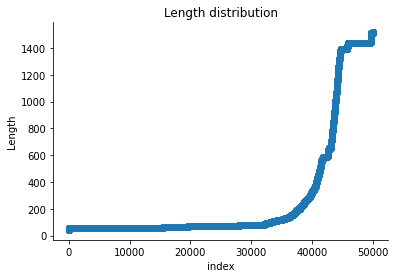

In [5]:
plt.scatter(range(X.shape[0]), np.sort(X['Length'].values))

plt.xlabel('index')
plt.ylabel('Length')
plt.title("Length distribution")
sns.despine()

Skewness: 1.958221
Kurtosis: 2.194744


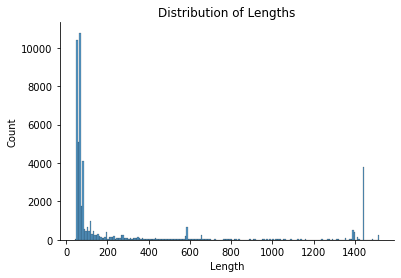

In [6]:
sns.histplot(X['Length'])
plt.title("Distribution of Lengths")
sns.despine()

print("Skewness: %f" % X['Length'].skew())
print("Kurtosis: %f" % X['Length'].kurt())

In [8]:
X['Source'].describe()

count                                                 50000
unique                                                 4898
top       2658138b4f5c034cec88af5c02372a3005f5503408ba4b...
freq                                                   2074
Name: Source, dtype: object

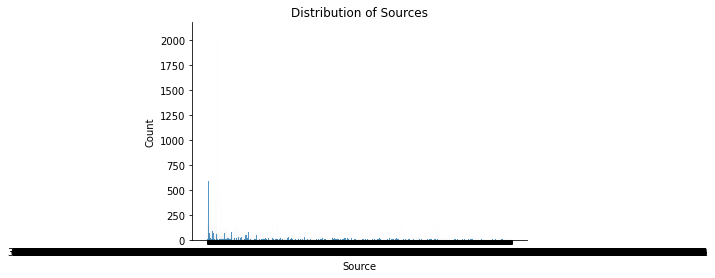

In [10]:
sns.histplot(X['Source'])
plt.title("Distribution of Sources")
sns.despine()

In [12]:
# List of the column names with nominal features that should be one-hot encoded
onehot_features = ['Source', 'Destination', 'Protocol', 'Info']

# One-hot encode these features 
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False) # we want a non-sparse matrix for concatenation
encoded = onehot.fit_transform(X[onehot_features])
encoded = pd.DataFrame(encoded) # the output of the encoding is a NumPy array, but we want it as a Pandas DataFrame

# One-hot encoding produces an output with more columns than the input, so we can't just reassign the output to X. 
# There are a few ways to put the encoded features in the original dataframe, but none of them are that elegant, so we'll just drop the old columns and concatenate the new
X.drop(onehot_features, axis=1, inplace=True)
X = pd.concat([X, encoded], axis=1)

# print encoded X for inspection

In [14]:
X.shape

(50000, 50142)

In [15]:
X.columns

Index([  'Time', 'Length',        0,        1,        2,        3,        4,
              5,        6,        7,
       ...
          50130,    50131,    50132,    50133,    50134,    50135,    50136,
          50137,    50138,    50139],
      dtype='object', length=50142)

In [16]:
X.head()

,Time,Length,0,1,2,3,4,5,6,7,...,50130,50131,50132,50133,50134,50135,50136,50137,50138,50139
0,0.000000,1167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000095,1440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000135,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000364,1228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000454,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
uniqueValues.shape

In [ ]:
model=IsolationForest(n_estimators=100, max_samples='auto', max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [ ]:
model.fit(X)

In [ ]:
X['scores'] =model.decision_function(X)
X['anomaly']=model.predict(X)

anomaly=X.loc[X['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)